# Case study on Data Preprocessing
**Sreehari P S**<br>*NORKA B5*

**Do the following on titanic dataset.**<br>
1. Load the dataset into python environment<br>
2. Make ‘PassengerId’ as the index column<br>
3. Check the basic details of the dataset<br>
4. Fill in all the missing values present in all the columns in the dataset<br>
5. Check and handle outliers in at least 3 columns in the dataset<br>
6. Do min max scaling on the feature set (Take ‘Survived’ as target)<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1. Load the dataset into python environment**<br>
**2. Make ‘PassengerId’ as the index column**

In [2]:
df = pd.read_csv('./datasets/titanic_dataset.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***

**3. Check the basic details of the dataset**

In [3]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
print('Shape of titanic dataset is :: ',df.shape)

Shape of titanic dataset is ::  (891, 11)


In [5]:
print('Basic summary of titanic dataset :: \n')
df.info()

Basic summary of titanic dataset :: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


From the stats it is clear that not all columns are fully filled.

In [6]:
df.groupby('Sex').count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312
male,577,577,577,453,577,577,577,577,107,577


In [7]:
df.nunique().sort_values(ascending=True)

Survived      2
Sex           2
Pclass        3
Embarked      3
SibSp         7
Parch         7
Age          88
Cabin       147
Fare        248
Ticket      681
Name        891
dtype: int64

6 Columns in this dataset describes some category with a max for 7 unique values for Parch and SibSp

In [8]:
df.describe().round(0)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,714.0,891.0,891.0,891.0
mean,0.0,2.0,30.0,1.0,0.0,32.0
std,0.0,1.0,15.0,1.0,1.0,50.0
min,0.0,1.0,0.0,0.0,0.0,0.0
25%,0.0,2.0,20.0,0.0,0.0,8.0
50%,0.0,3.0,28.0,0.0,0.0,14.0
75%,1.0,3.0,38.0,1.0,0.0,31.0
max,1.0,3.0,80.0,8.0,6.0,512.0


### 4. Fill in all the missing values present in all the columns in the dataset

In [9]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
print('Number of rows containing NAN = ', df.isna().any(axis = 1).sum())

Number of rows containing NAN =  708


In [11]:
df['Age'].fillna(round(df['Age'].mean(), 0), inplace = True)

In [12]:
df['Cabin'].fillna(df['Cabin'].mode().loc[0], inplace = True)

In [13]:
df['Embarked'].fillna(df['Embarked'].mode().loc[0], inplace = True)

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### 5. Check and handle outliers in at least 3 columns in the dataset

In [15]:
def find_outliers(series):
    Q1 = np.percentile(series, 25, interpolation = 'midpoint')
    Q2 = np.percentile(series, 50, interpolation = 'midpoint')
    Q3 = np.percentile(series, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5*IQR
    up_lim = Q3 + 1.5*IQR
    print(f'Q1 = {Q1}, Q2 = {Q2} and Q3 = {Q3}')
    print(f'IQR = {IQR}, Upper limit = {up_lim} and Lower limit = {low_lim}')
    outlier_list = []
    for x in series:
        if((x>up_lim) or (x<low_lim)):
            outlier_list.append(x)
    print(f'There are {len(outlier_list)} Outliers for {series.name}, they are {outlier_list}')
    return outlier_list

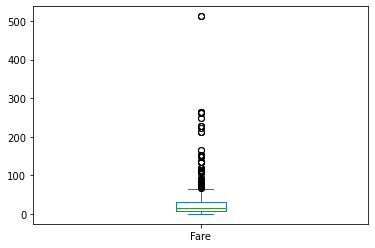

In [16]:
df['Fare'].plot.box()
plt.show()

In [17]:
age_outliers = find_outliers(df['Age'])
age_index = df[df['Age'].isin(age_outliers)].index
age_index

Q1 = 22.0, Q2 = 30.0 and Q3 = 35.0
IQR = 13.0, Upper limit = 54.5 and Lower limit = 2.5
There are 66 Outliers for Age, they are [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [18]:
df.drop(age_index, inplace = True)

In [19]:
df.shape

(825, 11)

In [20]:
fare_outliers = find_outliers(df['Fare'])
fare_index = df[df['Fare'].isin(fare_outliers)].index
fare_index

Q1 = 7.8958, Q2 = 13.4167 and Q3 = 30.0708
IQR = 22.174999999999997, Upper limit = 63.333299999999994 and Lower limit = -25.366699999999994
There are 107 Outliers for Fare, they are [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [21]:
df.drop(fare_index, inplace = True)
df.shape

(718, 11)

In [22]:
sib_outliers = find_outliers(df['SibSp'])
sib_index = df[df['SibSp'].isin(sib_outliers)].index
sib_index

Q1 = 0.0, Q2 = 0.0 and Q3 = 1.0
IQR = 1.0, Upper limit = 2.5 and Lower limit = -1.5
There are 29 Outliers for SibSp, they are [3, 4, 5, 3, 4, 5, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 4, 3, 4]


Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [23]:
df.drop(sib_index, inplace = True)
df.shape

(689, 11)

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [24]:
X = df[['Pclass', 'Age', 'SibSp','Parch','Fare']]

In [25]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,689.000000,689.000000,689.000000,689.000000,689.000000
mean,2.493469,29.169811,0.272859,0.269956,16.631246
std,0.723586,9.548083,0.501020,0.754625,13.092563
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,30.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.450000
max,3.000000,54.000000,2.000000,6.000000,61.379200


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range =(0,1))

In [28]:
X = scaler.fit_transform(X)

In [29]:
X= pd.DataFrame(X)

In [30]:
X.describe()

,0,1,2,3,4
count,689.000000,689.000000,689.00000,689.000000,689.000000
mean,0.746734,0.513134,0.13643,0.044993,0.270959
std,0.361793,0.187217,0.25051,0.125771,0.213306
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.500000,0.392157,0.00000,0.000000,0.127962
50%,1.000000,0.529412,0.00000,0.000000,0.171068
75%,1.000000,0.588235,0.00000,0.000000,0.382051
max,1.000000,1.000000,1.00000,1.000000,1.000000
